In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("../data/Coffee Shop Sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


# Check for missing values


In [41]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [42]:
#transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')


In [43]:
# Calculate total sales
df["total_sales"] = df["transaction_qty"] * df["unit_price"]



In [8]:
#Calculate total bills
df["total_bill"] = df["transaction_qty"] * df["unit_price"]


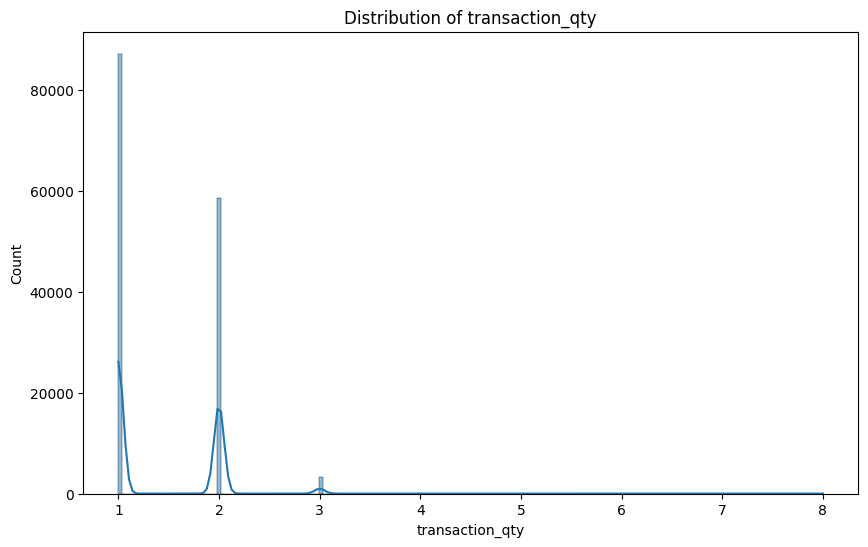

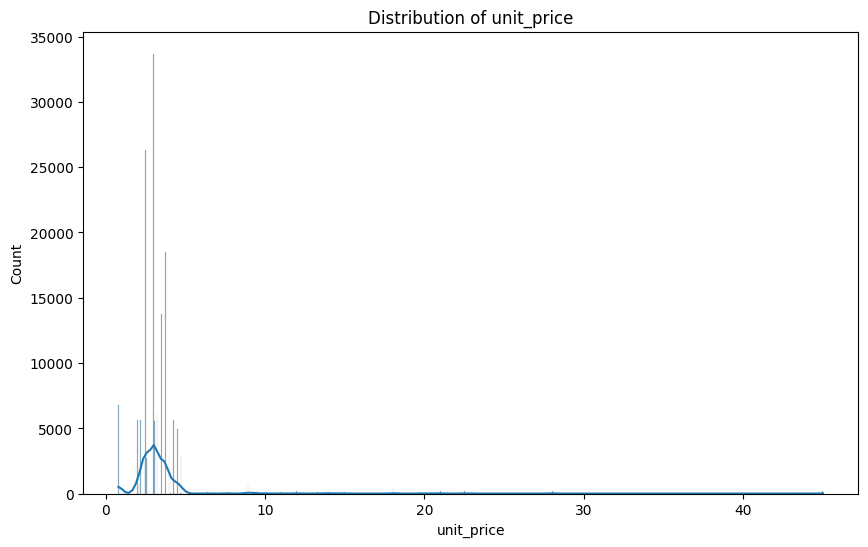

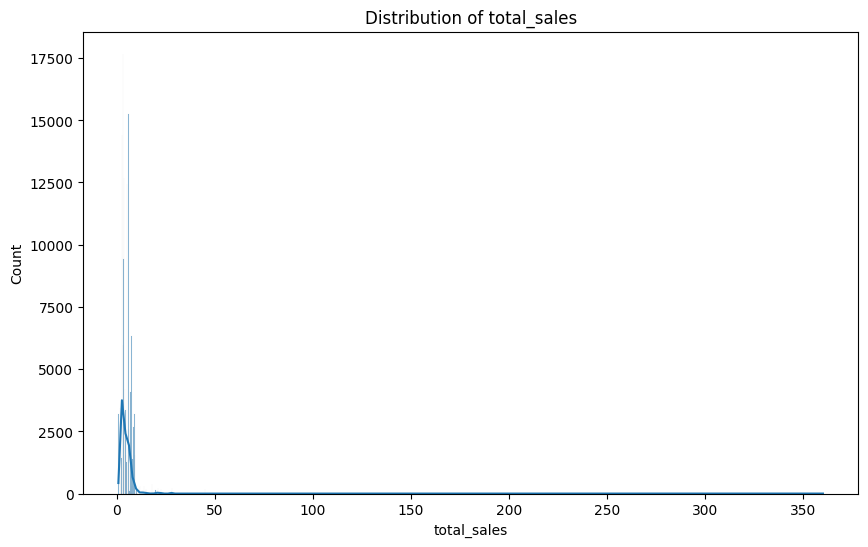

In [45]:

# Histograms for numerical attributes
numerical_cols = ['transaction_qty', 'unit_price', 'total_sales']  # Update with relevant numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Check for outliers in total_bill

In [46]:
# Total bill statistics

print(df["total_sales"].describe())


count    149116.000000
mean          4.686367
std           4.227099
min           0.800000
25%           3.000000
50%           3.750000
75%           6.000000
max         360.000000
Name: total_sales, dtype: float64


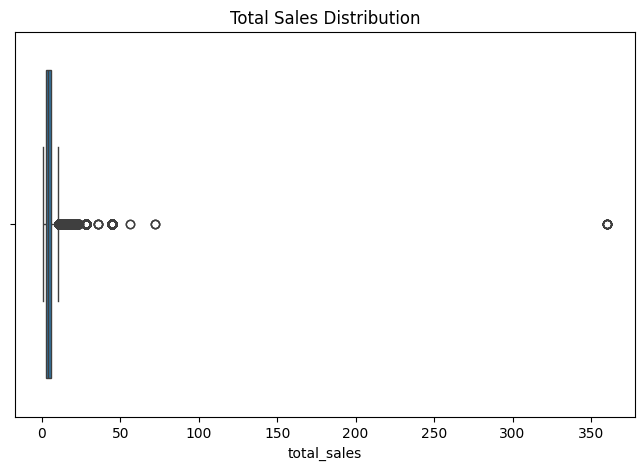

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["total_sales"])
plt.title("Total Sales Distribution")
plt.show()


In [51]:
# Extract month, week, and day of the week
df["month"] = df["transaction_date"].dt.month
df["week"] = df["transaction_date"].dt.isocalendar().week
df["day_of_week"] = df["transaction_date"].dt.day_name()

## Top-Selling Stores or Products

In [56]:
# Revenue by store
store_revenue = df.groupby(["store_location","month"])["total_sales"].sum().reset_index().sort_values(by="total_sales", ascending=False)
print(store_revenue)

# Revenue by product category
category_revenue = df.groupby("product_category")["total_sales"].sum().reset_index().sort_values(by="total_sales", ascending=False)
print(category_revenue)


     store_location  month  total_sales
11   Hell's Kitchen      6     56957.08
5           Astoria      6     55083.11
17  Lower Manhattan      6     54445.69
10   Hell's Kitchen      5     52598.93
4           Astoria      5     52428.76
16  Lower Manhattan      5     51700.07
9    Hell's Kitchen      4     40304.14
3           Astoria      4     39477.61
15  Lower Manhattan      4     39159.33
8    Hell's Kitchen      3     33110.57
14  Lower Manhattan      3     32888.68
2           Astoria      3     32835.43
6    Hell's Kitchen      1     27820.65
0           Astoria      1     27313.66
12  Lower Manhattan      1     26543.43
7    Hell's Kitchen      2     25719.80
13  Lower Manhattan      2     25320.05
1           Astoria      2     25105.34
     product_category  total_sales
2              Coffee    269952.45
8                 Tea    196405.95
0              Bakery     82315.64
4  Drinking Chocolate     72416.00
3        Coffee beans     40085.25
1             Branded     1360

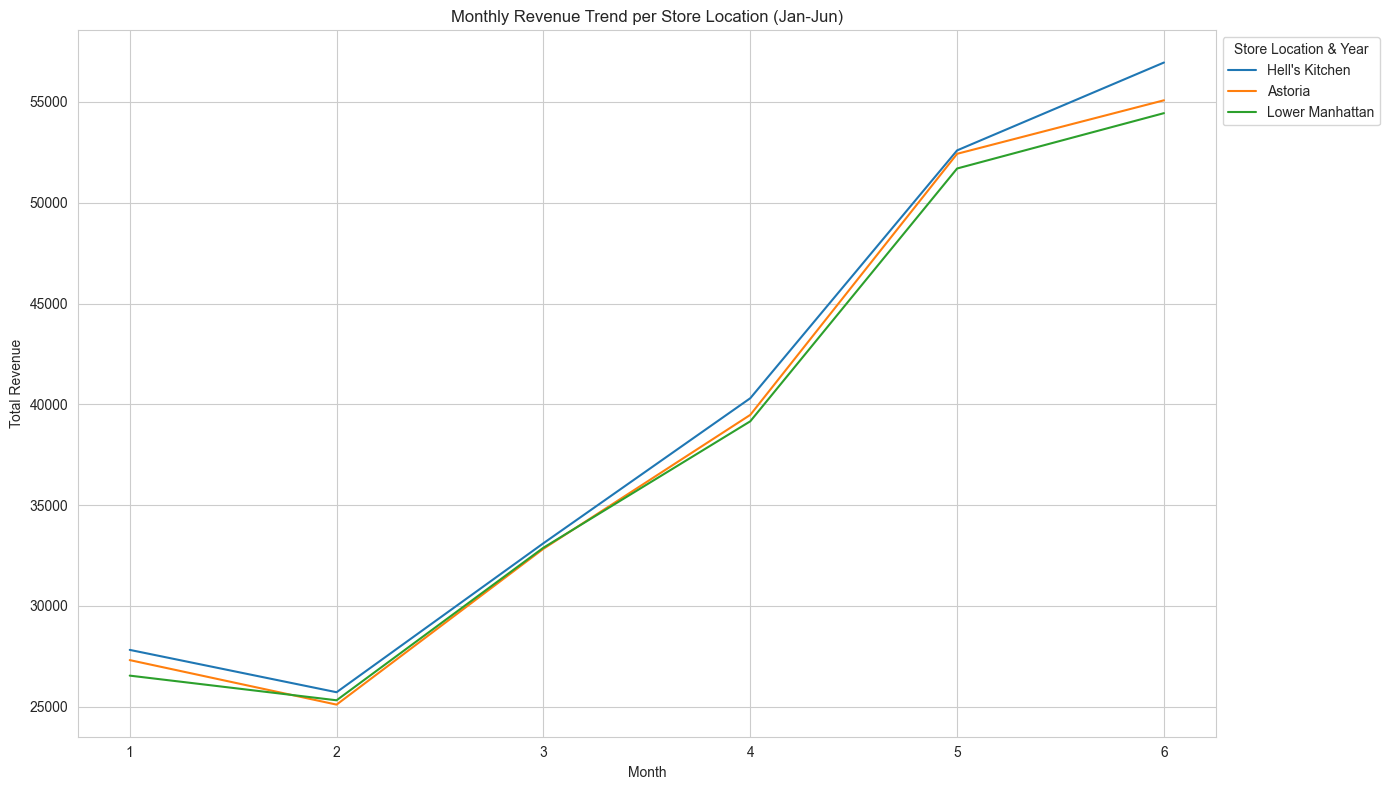

In [ ]:
sns.set_style("whitegrid")

# line plot
plt.figure(figsize=(14, 8))  # Adjust figure size as needed
sns.lineplot(x='month', y='total_sales', hue='store_location',  data=store_revenue, markers=True)

# labels and title
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trend per Store Location (Jan-Jun)')

# legend position
plt.legend(title='Store Location & sales', loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

# Display
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Exact month and day info

## Time based Analysis

In [60]:
df['category_count']=df['product_category'].value_counts()

# Unique categories
print(df['product_category'].value_counts())



product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


transaction_date
2023-01-01     550
2023-01-02     566
2023-01-03     582
2023-01-04     497
2023-01-05     547
              ... 
2023-06-26    1195
2023-06-27    1277
2023-06-28    1070
2023-06-29    1009
2023-06-30    1095
Length: 181, dtype: int64


Text(0.5, 0, 'Date')

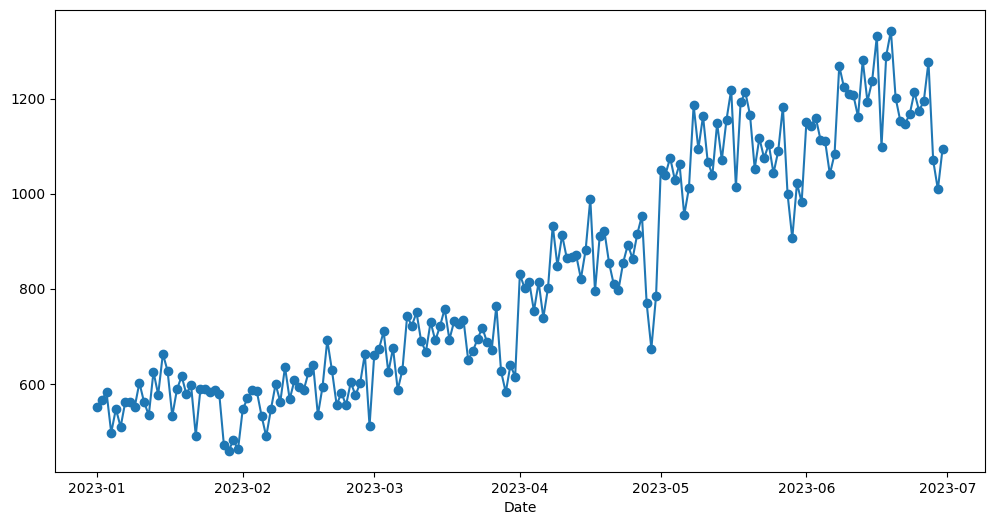

In [15]:
import matplotlib.pyplot as plt  

# Aggregate count by date
df_grouped = df.groupby('transaction_date').size()
print(df_grouped)
# Plot time series
plt.figure(figsize=(12,6))
plt.plot(df_grouped, marker='o', linestyle='-')
plt.xlabel("Date")

## Monthly sales trend

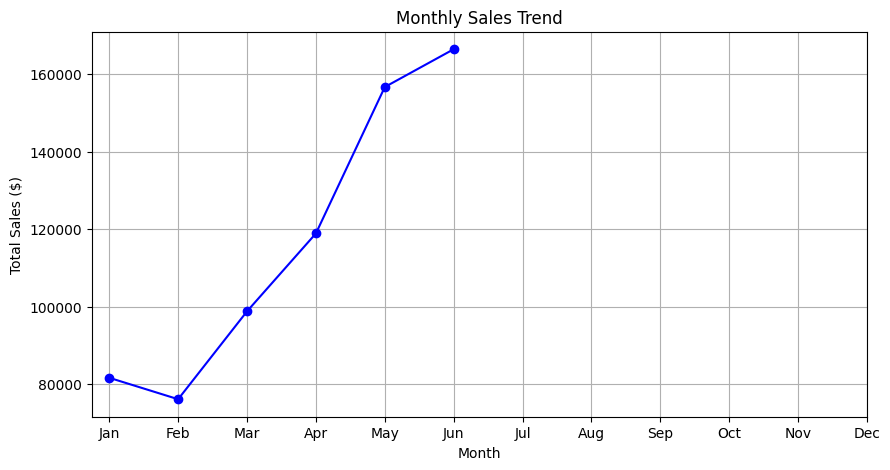

In [16]:
import matplotlib.pyplot as plt

# Aggregate total sales per month
monthly_sales = df.groupby("month")["total_bill"].sum().reset_index()

# Plot monthly sales trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["month"], monthly_sales["total_bill"], marker="o", linestyle="-", color="blue")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()


## Hourly sales Pattern

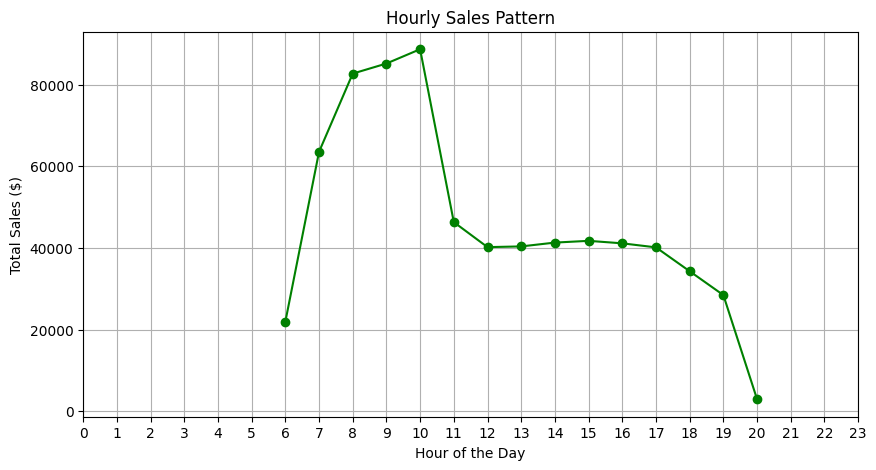

In [17]:
# Extract hour from transaction_time
df["hour"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S").dt.hour

# Aggregate total sales per hour
hourly_sales = df.groupby("hour")["total_bill"].sum().reset_index()

# Plot hourly sales trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_sales["hour"], hourly_sales["total_bill"], marker="o", linestyle="-", color="green")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales ($)")
plt.title("Hourly Sales Pattern")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


## Best-Selling Products by Season

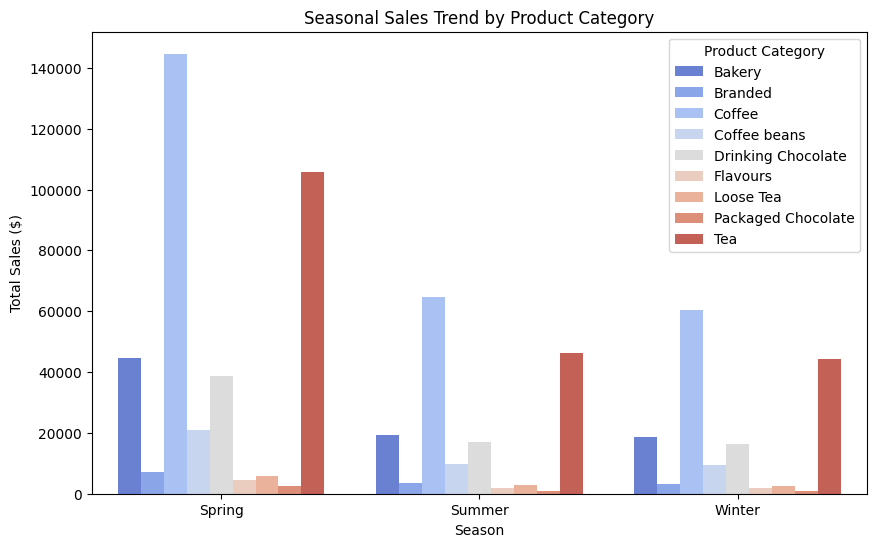

In [18]:
# Define seasons
season_mapping = {1: "Winter", 2: "Winter", 3: "Spring", 4: "Spring", 5: "Spring", 6: "Summer",
                  7: "Summer", 8: "Summer", 9: "Fall", 10: "Fall", 11: "Fall", 12: "Winter"}

df["season"] = df["month"].map(season_mapping)

# Aggregate total sales per product and season
seasonal_sales = df.groupby(["season", "product_category"])["total_bill"].sum().reset_index()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
sns.barplot(x="season", y="total_bill", hue="product_category", data=seasonal_sales, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Total Sales ($)")
plt.title("Seasonal Sales Trend by Product Category")
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()


## Sales by Day of the Week for Each Product Category

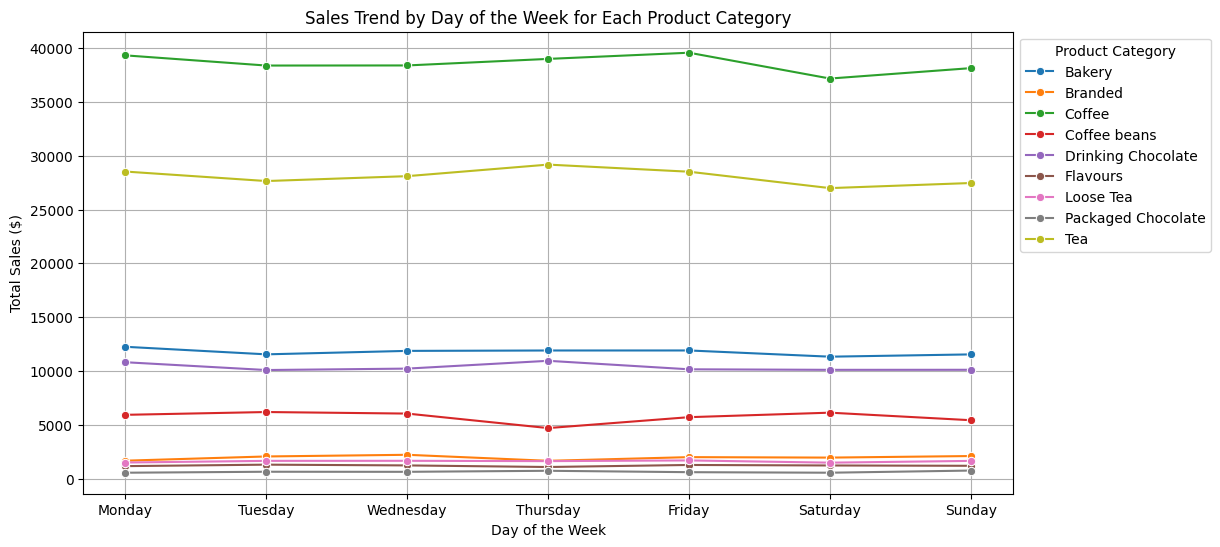

In [19]:
# Aggregate total sales by product category and day of the week
weekday_sales = df.groupby(["day_of_week", "product_category"])["total_bill"].sum().reset_index()

# Order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["day_of_week"] = pd.Categorical(weekday_sales["day_of_week"], categories=weekday_order, ordered=True)

# Plot sales by day of the week for each product category
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="total_bill", hue="product_category", data=weekday_sales, marker="o", palette="tab10")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend by Day of the Week for Each Product Category")
plt.grid(True)
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()


## Create column for month day size

In [20]:
df['Month Name'] = df['transaction_date'].dt.month_name()
df['Day Name'] = df['transaction_date'].dt.day_name()
df['Size'] = df['product_detail'].str.extract(r'Size: (\w+)')


# Sales based on store location

# Group by store location, year, and month, then calculate total revenue


In [ ]:
# Aggregate total sales by product category and day of the week
weekday_sales = df.groupby(["day_of_week"])["total_bill"].sum().reset_index()

# Order days correctly
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales["day_of_week"] = pd.Categorical(weekday_sales["day_of_week"], categories=weekday_order, ordered=True)

# Plot sales by day of the week for each product category
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="total_bill", hue="product_category", data=weekday_sales, marker="o", palette="tab10")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend by Day of the Week for Each Product Category")
plt.grid(True)
plt.legend(title="Product Category", bbox_to_anchor=(1,1))
plt.show()

KeyError: 'month'

## get dummies for data



In [21]:
sales_data_with_dummies = pd.get_dummies(df, columns=['store_location', 'product_category', 'product_type', 'Size', 'Month Name', 'Day Name'], drop_first=True)
sales_data_with_dummies.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,product_detail,total_sales,total_bill,...,Month Name_January,Month Name_June,Month Name_March,Month Name_May,Day Name_Monday,Day Name_Saturday,Day Name_Sunday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday
0,1,2023-01-01,07:06:11,2,5,32,3.0,Ethiopia Rg,6.0,6.0,...,True,False,False,False,False,False,True,False,False,False
1,2,2023-01-01,07:08:56,2,5,57,3.1,Spicy Eye Opener Chai Lg,6.2,6.2,...,True,False,False,False,False,False,True,False,False,False
2,3,2023-01-01,07:14:04,2,5,59,4.5,Dark chocolate Lg,9.0,9.0,...,True,False,False,False,False,False,True,False,False,False
3,4,2023-01-01,07:20:24,1,5,22,2.0,Our Old Time Diner Blend Sm,2.0,2.0,...,True,False,False,False,False,False,True,False,False,False
4,5,2023-01-01,07:22:41,2,5,57,3.1,Spicy Eye Opener Chai Lg,6.2,6.2,...,True,False,False,False,False,False,True,False,False,False


## Price sensitive analysis

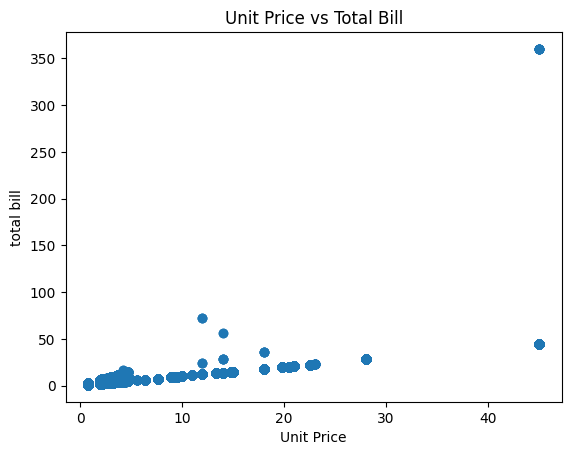

In [22]:
#Relationship between 'unit_price' and 'Total_Bill'
plt.scatter(df['unit_price'], df['total_bill'])
plt.xlabel('Unit Price')
plt.ylabel('total bill')
plt.title('Unit Price vs Total Bill')
plt.show()



In [23]:
print(sales_data_with_dummies.columns)


Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'product_id', 'unit_price',
       'product_detail', 'total_sales', 'total_bill', 'month', 'week',
       'day_of_week', 'category_count', 'hour', 'season',
       'store_location_Hell's Kitchen', 'store_location_Lower Manhattan',
       'product_category_Branded', 'product_category_Coffee',
       'product_category_Coffee beans', 'product_category_Drinking Chocolate',
       'product_category_Flavours', 'product_category_Loose Tea',
       'product_category_Packaged Chocolate', 'product_category_Tea',
       'product_type_Biscotti', 'product_type_Black tea',
       'product_type_Brewed Black tea', 'product_type_Brewed Chai tea',
       'product_type_Brewed Green tea', 'product_type_Brewed herbal tea',
       'product_type_Chai tea', 'product_type_Clothing',
       'product_type_Drinking Chocolate', 'product_type_Drip coffee',
       'product_type_Espresso Beans', 'product_type_Gourme

In [24]:
df.rename(columns={'total_bill': 'Count'}, inplace=True)


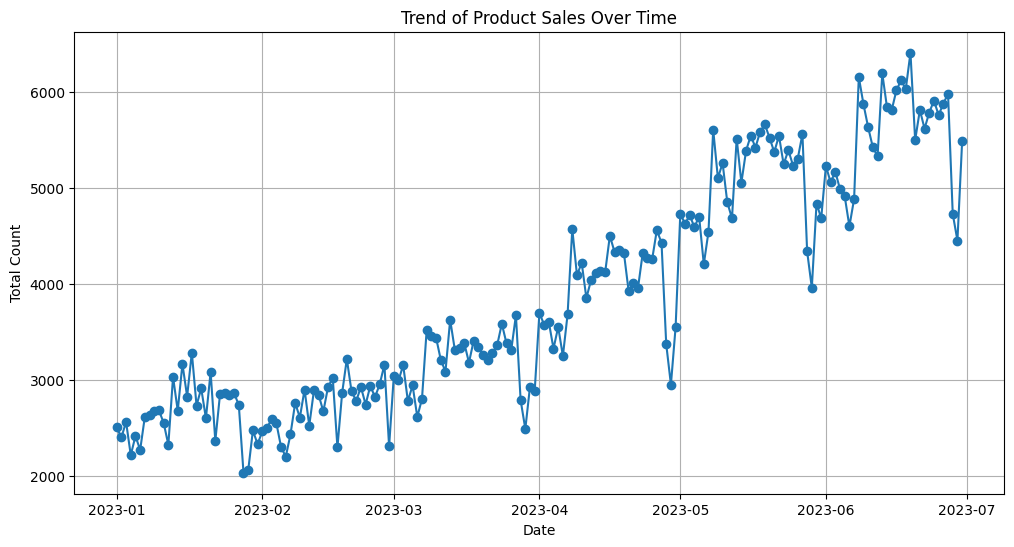

In [26]:
import matplotlib.pyplot as plt  

# Aggregate count by date
df_grouped = df.groupby('transaction_date')['Count'].sum()

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(df_grouped, marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.title("Trend of Product Sales Over Time")
plt.grid()
plt.show()


In [27]:

# Extract features
df["day_of_week"] = df["transaction_date"].dt.day_name()  # Monday, Tuesday, etc.
df["week_number"] = df["transaction_date"].dt.strftime('%U').astype(int)  # Week number

# Display the first few rows
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type  ... month  week  day_of_week  category_count  hour  \
0  Gourmet brewed coffee  ... 

C:\Users\vijay\AppData\Local\Temp\ipykernel_22788\1490242990.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="coolwarm", hue=None)


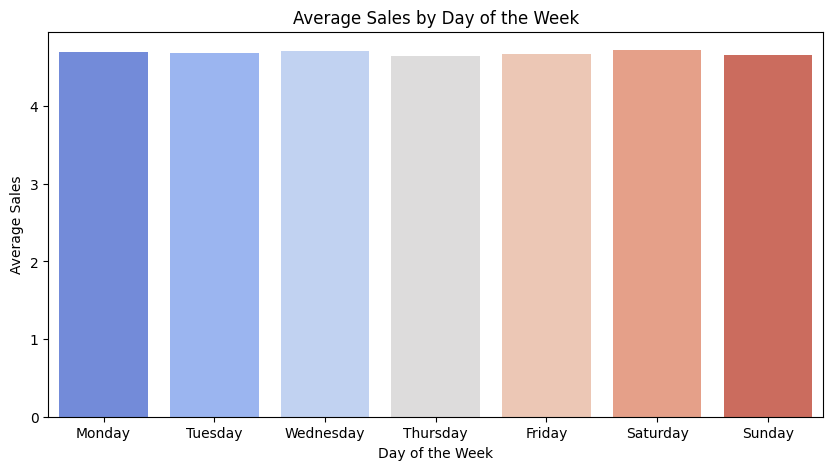

In [34]:
# Group by day of the week
daywise_sales = df.groupby("day_of_week")["total_sales"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="coolwarm", hue=None)
# sns.barplot(data=daywise_sales.reset_index(), x="day_of_week", y="sales", palette="coolwarm", legend=False)
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.show()